# ***Cleaned DATASET EDA***

**Import Libraries & Cleaned DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('spotify_cleaned.csv')

In [3]:
df.head()
df.info()
df.describe()
df['churned'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    993 non-null    object 
 1   avg_daily_minutes          993 non-null    float64
 2   number_of_playlists        993 non-null    int64  
 3   skips_per_day              993 non-null    int64  
 4   support_tickets            993 non-null    int64  
 5   days_since_last_login      993 non-null    int64  
 6   churned                    993 non-null    int64  
 7   subscription_type_premium  993 non-null    bool   
 8   top_genre_country          993 non-null    bool   
 9   top_genre_electronic       993 non-null    bool   
 10  top_genre_hip-hop          993 non-null    bool   
 11  top_genre_jazz             993 non-null    bool   
 12  top_genre_pop              993 non-null    bool   
 13  top_genre_rock             993 non-null    bool   

churned
0    0.81571
1    0.18429
Name: proportion, dtype: float64

**Univariate Analysis**

1. Churn Distribution

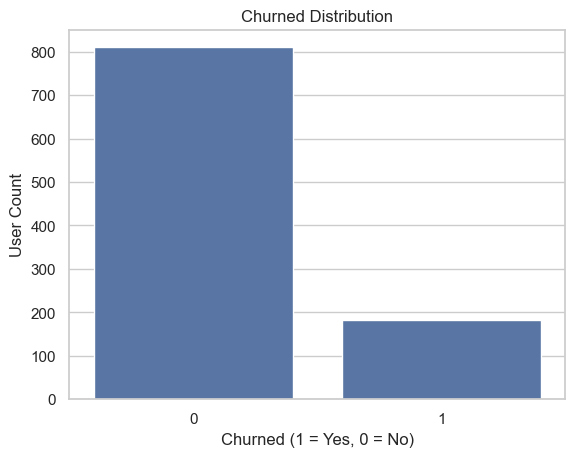

In [4]:
sns.countplot(x='churned', data=df)
plt.title("Churned Distribution")
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("User Count")
plt.show()


2. Subscription Type Distribution

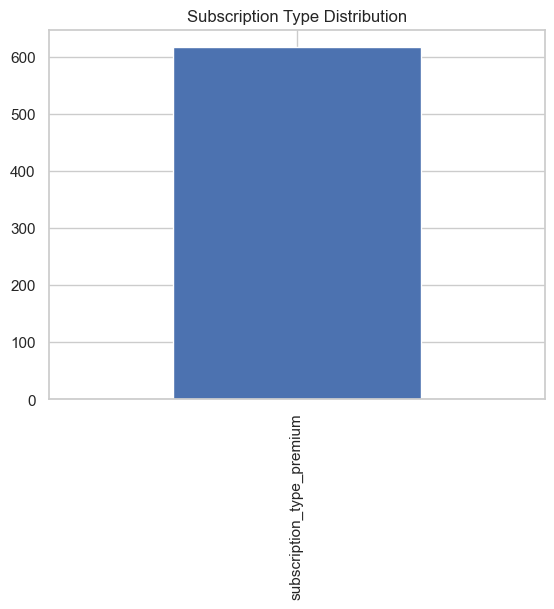

In [5]:
subscription_cols = [col for col in df.columns if "subscription_type" in col]
df[subscription_cols]. sum().plot(kind = 'bar')
plt.title("Subscription Type Distribution")
plt.show()

3. Top Genres

<Axes: >

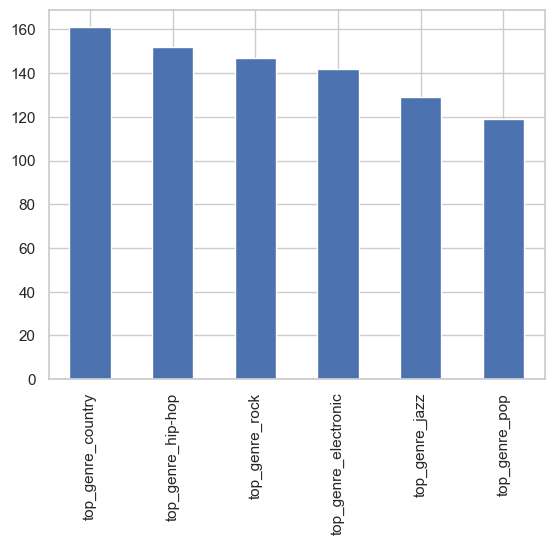

In [6]:
genre_cols = [col for col in df.columns if "top_genre" in col]
df[genre_cols].sum().sort_values(ascending=False).head(10).plot(kind='bar')


**Bivariate Analysis**

1. Churn vs Avg Daily Listening Minutes

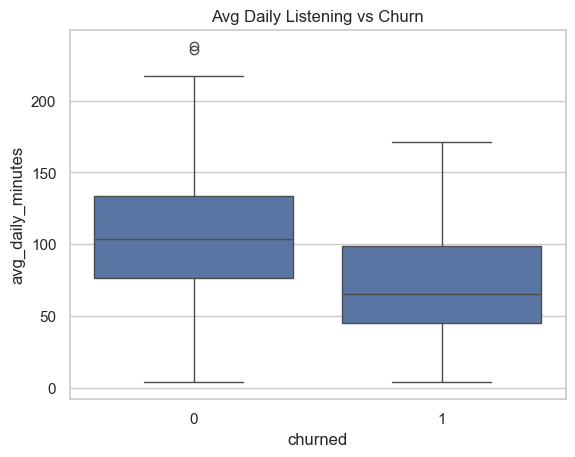

In [7]:
sns.boxplot(x='churned', y='avg_daily_minutes', data=df)
plt.title("Avg Daily Listening vs Churn")
plt.show()


2. Churn vs Number of Playlist

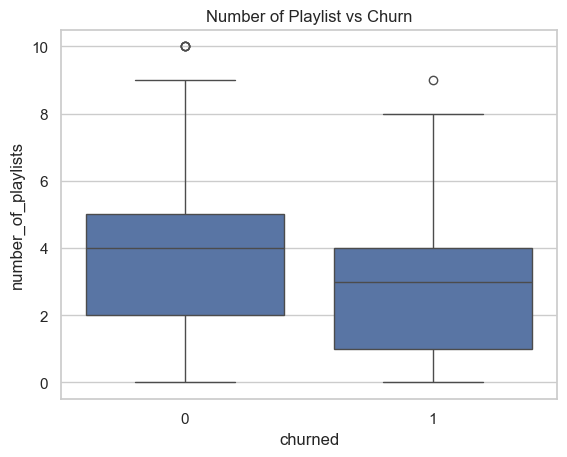

In [8]:
sns.boxplot(x='churned', y='number_of_playlists', data=df)
plt.title("Number of Playlist vs Churn")
plt.show()


3. Churn vs Days since last Login

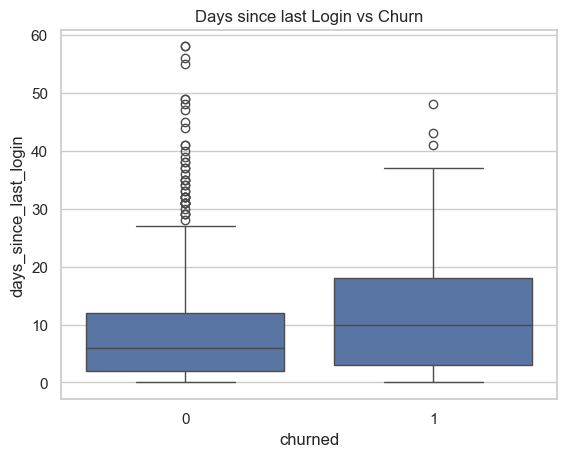

In [9]:
sns.boxplot(x='churned', y='days_since_last_login', data=df)
plt.title("Days since last Login vs Churn")
plt.show()


**Correlation Heatmap**

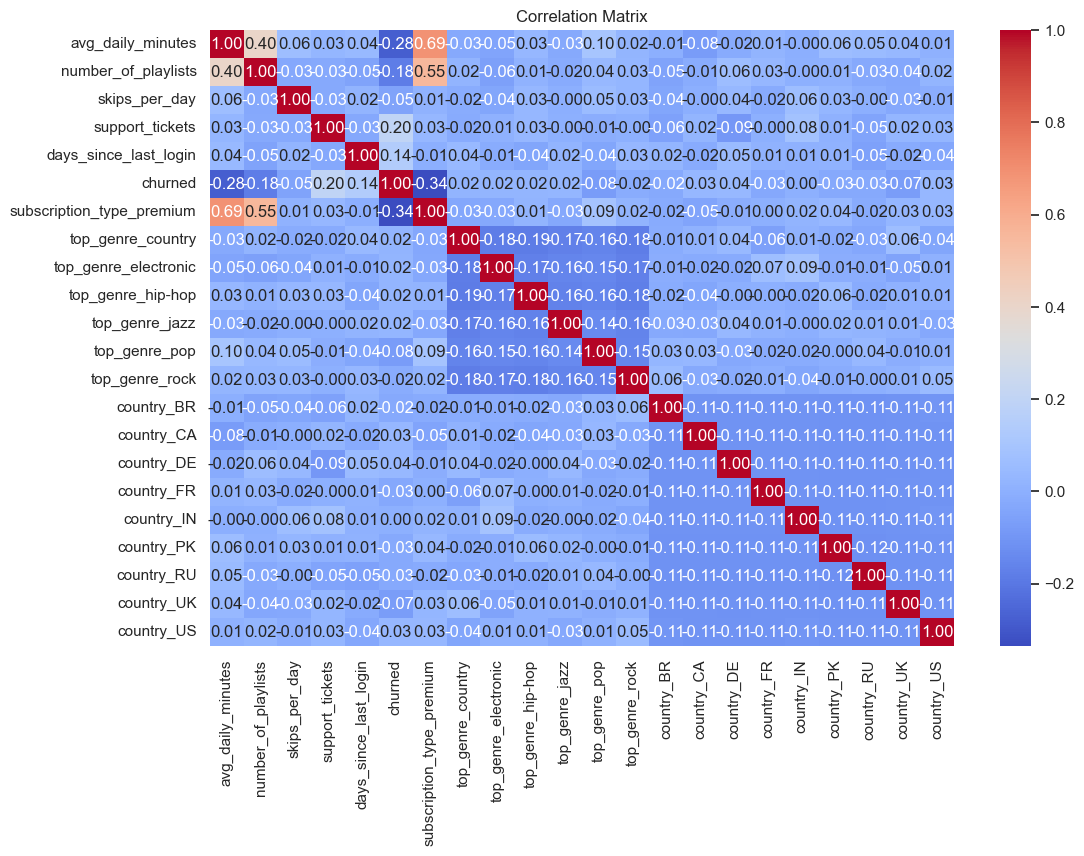

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


**Engagement score vs Churn**

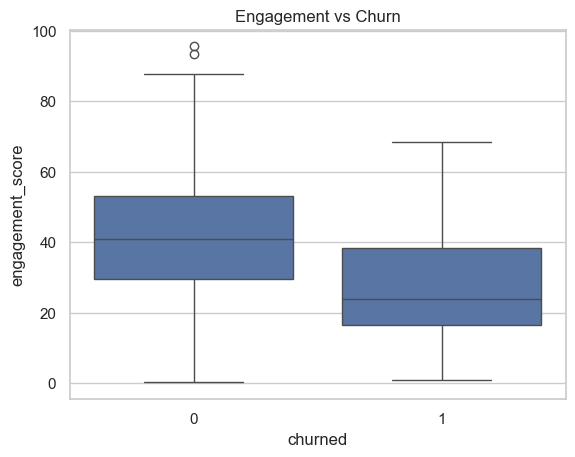

In [11]:
df['engagement_score'] = (
    df['avg_daily_minutes'] * 0.4 +
    df['number_of_playlists'] * 0.3 -
    df['skips_per_day'] * 0.2 -
    df['days_since_last_login'] * 0.1
)
sns.boxplot(x='churned', y='engagement_score', data=df)
plt.title("Engagement vs Churn")
plt.show()

df.to_csv("spotify_cleaned_with_engagement.csv", index=False)